<h1 style="text-align: center;">Introduction to Data Science - Assignment 1</h1>
<h3 style="text-align: center;">Name: Hugo Hayashi</h3>
<h3 style="text-align: center;">Student ID: 22446441</h3>



## Question 1


In [26]:
# Your fancy code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

credit = pd.read_csv('Credit.csv')
credit.head(5)

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [27]:
credit['status_Single'] = (credit['Married'] == 'No').astype(int)
credit['ethnicity_Asian'] = (credit['Ethnicity'] == 'Asian').astype(int)
credit['ethnicity_Caucasian'] = (credit['Ethnicity'] == 'Caucasian').astype(int)

X = credit[['Income', 'status_Single', 'ethnicity_Asian', 'ethnicity_Caucasian']]
X = sm.add_constant(X)
y = credit['Balance']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     27.13
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           6.58e-20
Time:                        23:25:24   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5952.
Df Residuals:                     395   BIC:                             5972.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 231.6930    

- Constant: 231.6930, p-value: 0.000, Significant
- Income: 6.0627, p-value: 0.000, Signficant
- Single: 21.5392, p-value: 0.611, Not Significant
- Asian: 5.9666, p-value: 0.918, Not Significant
- Caucasion: 0.6562, p-value: 0.864, Not Significant

In [28]:
credit['income_Single'] = credit['Income'] * credit['status_Single']

X2 = credit[['Income', 'status_Single', 'ethnicity_Asian', 'ethnicity_Caucasian', 'income_Single']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     21.71
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           3.28e-19
Time:                        23:25:24   Log-Likelihood:                -2970.7
No. Observations:                 400   AIC:                             5953.
Df Residuals:                     394   BIC:                             5977.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 239.8254    

The relationship between income and balance does not differ in a meaningful way between Single and non-Single customers since the $R^2$ values are the same.

## Question 2

In [29]:
#More code and comments...
auto = pd.read_csv('Auto.csv')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto_clean = auto.dropna(subset=['horsepower', 'mpg']).copy()

for n in range(6):
    auto_clean[f'hp{n}'] = auto_clean['horsepower'] ** n

y = auto_clean['mpg']

X_A = auto_clean[['hp1']]
X_A = sm.add_constant(X_A)

model_A = sm.OLS(y, X_A).fit()
print(f"{model_A.summary()}\n")

X_B = auto_clean[['hp1', 'hp2']]
X_B = sm.add_constant(X_B)

model_B = sm.OLS(y, X_B).fit()
print(f"\n{model_B.summary()}\n")

X_C = auto_clean[['hp1', 'hp2', 'hp3', 'hp4', 'hp5']]
X_C = sm.add_constant(X_C)

model_C = sm.OLS(y, X_C).fit()
print(model_C.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        23:25:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y, test_size=0.5, random_state=2025)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y, test_size=0.5, random_state=2025)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y, test_size=0.5, random_state=2025)

model_A_Linear = LinearRegression().fit(X_train_A, y_train_A)
model_B_Linear = LinearRegression().fit(X_train_B, y_train_B)
model_C_Linear = LinearRegression().fit(X_train_C, y_train_C)

print('Model A')
print(f'Train score: {model_A_Linear.score(X_train_A, y_train_A)}')
print(f'Test score: {model_A_Linear.score(X_test_A, y_test_A)}\n')

print('Model B')
print(f'Train score: {model_B_Linear.score(X_train_B, y_train_B)}')
print(f'Test score: {model_B_Linear.score(X_test_B, y_test_B)}\n')

print('Model C')
print(f'Train score: {model_C_Linear.score(X_train_C, y_train_C)}')
print(f'Test score: {model_C_Linear.score(X_test_C, y_test_C)}\n')

Model A
Train score: 0.6174796303733272
Test score: 0.5908407888931293

Model B
Train score: 0.7196551097840673
Test score: 0.6469518890540444

Model C
Train score: 0.7245419099065096
Test score: 0.6533739838602268



Model A
Train R-squared score: 0.6174796303733272
Test R-squared score: 0.5908407888931293
Model B
Train R-squared score: 0.7196551097840673
Test R-squared score: 0.6469518890540444
Model C
Train R-squared score: 0.7245419099065096
Test R-squared score: 0.6533739838602268


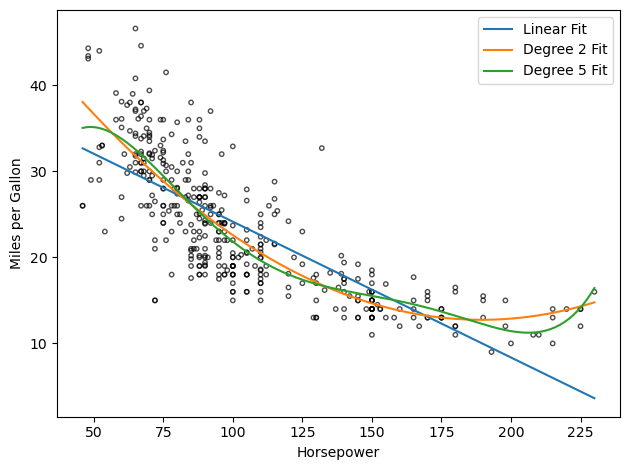

<Figure size 640x480 with 0 Axes>

In [32]:
print('Model A')
print(f'Train R-squared score: {model_A_Linear.score(X_train_A, y_train_A)}')
print(f'Test R-squared score: {model_A_Linear.score(X_test_A, y_test_A)}')

print('Model B')
print(f'Train R-squared score: {model_B_Linear.score(X_train_B, y_train_B)}')
print(f'Test R-squared score: {model_B_Linear.score(X_test_B, y_test_B)}')

print('Model C')
print(f'Train R-squared score: {model_C_Linear.score(X_train_C, y_train_C)}')
print(f'Test R-squared score: {model_C_Linear.score(X_test_C, y_test_C)}')

x_grid = np.linspace(auto_clean['hp1'].min(), 
                     auto_clean['hp1'].max(), 500)

df_lin = pd.DataFrame({'horsepower': x_grid})
df_lin = sm.add_constant(df_lin)
y_lin = model_A.predict(df_lin)

df_quad = pd.DataFrame({'horesepower': x_grid})
df_quad['hp2'] = x_grid ** 2
df_quad = sm.add_constant(df_quad)
y_quad = model_B.predict(df_quad)

df_5 = pd.DataFrame({'horsepower': x_grid})
for deg in range(2, 6):
    df_5[f'hp{deg}'] = x_grid**deg
df_5 = sm.add_constant(df_5)
y_5 = model_C.predict(df_5)

plt.figure()
plt.scatter(auto_clean['horsepower'], auto_clean['mpg'], marker='o',
            facecolors='none', edgecolors='black', s=10, alpha=0.7)
plt.plot(x_grid, y_lin, label='Linear Fit')
plt.plot(x_grid, y_quad, label='Degree 2 Fit')
plt.plot(x_grid, y_5, label='Degree 5 Fit')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('horse vs mpg.png')

- Score gap of Model A: 0.026
- Score gap of Model B: 0.073
- Score gap of Model C: 0.072

The linear fit doesn't show much overfitting, the quadratic begins to overfit but still has the best test-set $R^2$, whereas the 5th-degree polynomial clearly overfits.

## Question 3

Test size: 0.3
Accuracy in train data: 0.974
Accuracy in test data: 0.972
Test size: 0.5
Accuracy in train data: 0.975
Accuracy in test data: 0.971
Test size: 0.7
Accuracy in train data: 0.976
Accuracy in test data: 0.972


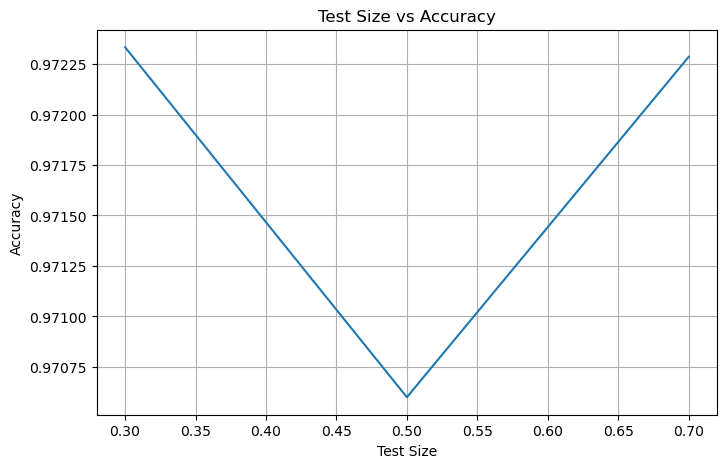

In [34]:
from sklearn.linear_model import LogisticRegression

default = pd.read_csv('Default.csv')

default['default_bool'] = (default['default'] == 'Yes').astype(int)
default['student_bool'] = (default['student'] == 'Yes').astype(int)

X = default[['balance', 'income', 'student_bool']]
y = default.default_bool

sizes = [0.3, 0.5, 0.7]
test_accuracy = []

for n in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=0)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print(f'Test size: {n}')
    print('Accuracy in train data: {:.3f}'.format(model.score(X_train, y_train)))
    print('Accuracy in test data: {:.3f}'.format(model.score(X_test, y_test)))
    test_accuracy.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(sizes, test_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Test Size vs Accuracy')
plt.grid(True)
plt.show()

Across splits of 70%, 50%, and 30% for training, test accuracy stays virtually flat ($\approx 0.972 \pm 0.001$), so shrinking the training set has little effect on generalisation; the only change is a tiny rise in training accuracy, hinting at marginally more overfitting when far less data are used.

## Question 4